# KCNH5 and developmental and epileptic encephalopathy-112 (DEE112)


[DEE112](https://omim.org/entry/620537) is caused by heterozygous mutation in the [KCNH5](https://omim.org/entry/605716) gene.

KCNH5 encodes the voltage-gated potassium channel EAG2/Kv10.2. developmental and epileptic
encephalopathy 112 (DEE112) an autosomal dominant disorder characterized by a wide range of seizure types, including focal and generalized seizures. Cognitive outcomes range from normal intellect to profound impairment ([Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/)).

For this analysis, we have collected data from the following publications.

- [Veeramah KR,  et al., 2013](https://pubmed.ncbi.nlm.nih.gov/23647072/) Exome sequencing reveals new causal mutations in children with epileptic encephalopathies. 
- [Minardi R, et al., 2020](https://pubmed.ncbi.nlm.nih.gov/32725632/) Whole-exome sequencing in adult patients with developmental and epileptic encephalopathy: It is never too late. 
- [Hu X, et al., 2022](https://pubmed.ncbi.nlm.nih.gov/35874597/),Clinical Feature, Treatment, and KCNH5 Mutations in Epilepsy.
- [Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/), Neurodevelopmental and Epilepsy Phenotypes in Individuals With Missense Variants in the Voltage-Sensing and Pore Domains of KCNH5.
- [Huang S, et al., 2024 ](https://pubmed.ncbi.nlm.nih.gov/38708366/) Clinical phenotypes of developmental and epileptic encephalopathy-related recurrent KCNH5 missense variant p.R327H in Chinese children. 

- [Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/) reported that
>  Individuals with the recurrent p.Arg333His variant had a self-limited drug-responsive focal or generalized epilepsy and normal intellect, whereas the recurrent p.Arg327His variant was associated with infantile-onset DEE. 
- [Huang S, et al., 2024 ](https://pubmed.ncbi.nlm.nih.gov/38708366/) described potential correlations for R327H
> The authors investigate the first Chinese cohort of KCNH5 p.R327H-associated DEE and the incomplete penetrance of this KCNH5 variant. Add-on VPA therapy could be effective in such patients, especially in their early stages.

None of the above publications applied formal statistical testing to the data.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.6.dev0


### KCNH5
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for KCNH5.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service

gene_symbol = "KCNH5"
mane_tx_id = 'NM_139318.5'
mane_protein_id = 'NP_647479.2' 
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(release="0.1.24") as ps:
  phenopackets = list(ps.iter_cohort_phenopackets(gene_symbol))
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
   phenopackets=phenopackets,
   cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 27/27 [00:00<00:00, 249.19 individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #24
    individual
     warnings:
     ·ontology_class of the time_at_last_encounter field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
24,EEG abnormality
19,Epileptic encephalopathy
17,Bilateral tonic-clonic seizure
13,Intellectual disability
11,Global developmental delay
11,Delayed speech and language development
7,Focal-onset seizure
6,Bilateral tonic-clonic seizure with focal onset
5,Focal motor seizure
5,Autistic behavior


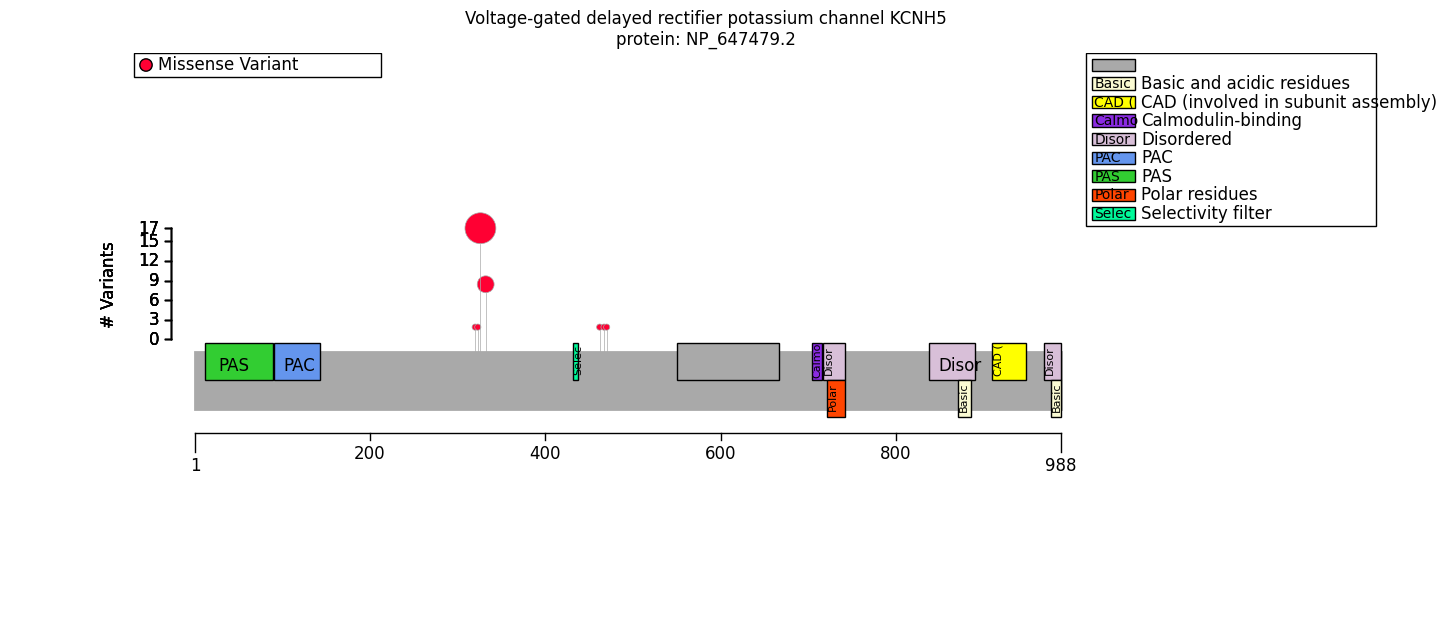

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

kcnh5_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
kcnh5_fig.tight_layout()

# Genotype Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.analysis.predicate import variant_key
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import monoallelic_classifier

r327h = variant_key("14_62950522_62950522_C_T")  # c.980G>A; p.Arg327His
r333h = variant_key("14_62950504_62950504_C_T") # c.998G>A	p.Arg333His

r327h_clf = monoallelic_classifier(
    a_predicate=r327h,
    b_predicate=r333h,
    a_label="Arg327His",
    b_label="Arg333His"
)
r327h_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r327h_clf,
    pheno_clfs=pheno_clfs,
)

mtc_viewer = MtcStatsViewer()
mtc_viewer.process(r327h_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,4
Skipping term because one genotype had zero observations,1
"Skipping ""general"" level terms",15
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),52


In [8]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo=hpo, result=r327h_result)

Allele group,Arg327His,Arg333His,Corrected p values,p values
Epileptic encephalopathy [HP:0200134],15/15 (100%),0/3 (0%),0.031863,0.001225
Intellectual disability [HP:0001249],11/11 (100%),0/2 (0%),0.166667,0.012821
EEG abnormality [HP:0002353],16/16 (100%),2/4 (50%),0.273684,0.031579
Focal impaired awareness motor seizure [HP:0032712],1/8 (12%),2/4 (50%),1.000000,0.236364
Myoclonic seizure [HP:0032794],1/17 (6%),1/4 (25%),1.000000,0.352381
Chiari type I malformation [HP:0007099],0/7 (0%),1/4 (25%),1.000000,0.363636
Hypotonia [HP:0001252],1/11 (9%),1/4 (25%),1.000000,0.476190
Autistic behavior [HP:0000729],5/16 (31%),0/4 (0%),1.000000,0.530444
Bilateral tonic-clonic seizure with focal onset [HP:0007334],3/12 (25%),2/4 (50%),1.000000,0.546703
Status epilepticus [HP:0002133],0/17 (0%),0/4 (0%),1.000000,1.000000


In [9]:
from gpsea.analysis.clf import sex_classifier
mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Developmental regression [HP:0002376],0/11 (0%),3/8 (38%),1.0,0.057792
Attention deficit hyperactivity disorder [HP:0007018],0/14 (0%),2/12 (17%),1.0,0.203077
Epileptic encephalopathy [HP:0200134],8/11 (73%),11/11 (100%),1.0,0.214286
Focal hemiclonic seizure [HP:0006813],0/14 (0%),1/13 (8%),1.0,0.481481
Generalized non-motor (absence) seizure [HP:0002121],0/14 (0%),1/13 (8%),1.0,0.481481
EEG abnormality [HP:0002353],12/14 (86%),12/12 (100%),1.0,0.483077
Intellectual disability [HP:0001249],5/7 (71%),8/9 (89%),1.0,0.550000
Myoclonic seizure [HP:0032794],3/14 (21%),1/13 (8%),1.0,0.595556
Hypotonia [HP:0001252],3/12 (25%),1/8 (12%),1.0,0.618576
Autistic behavior [HP:0000729],2/14 (14%),3/12 (25%),1.0,0.634783


# Summary

In [10]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=r327h_result,
    ),
     GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)
cohort_name = gene_symbol

caption = """Two recurrent variants have been reported, p.Arg327His and p.Arg333His, both of which are located in or near the functionally critical 
voltage-sensing or pore domains. Happ et al (2023) state that in their cohort, Individuals with the recurrent p.Arg333His variant had a self-limited 
drug-responsive focal or generalized epilepsy and normal intellect, whereas the recurrent p.Arg327His variant was associated with infantile-onset DEE."""

report = GpseaAnalysisReport(
    name=cohort_name,
    cohort=cohort,
    fet_results=fet_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
    caption=caption)

In [11]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [12]:
summarizer.process_latex(report=report, protein_fig=kcnh5_fig)

Figure saved to ../../supplement/img/KCNH5_protein_diagram-draft.pdf
Output to ../../supplement/tex/KCNH5_summary_draft.tex
